<a href="https://colab.research.google.com/github/BushGenius/machine_learning/blob/main/Employee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# **Анализ датасета**



#1. Загрузка данных


In [ ]:
url = "https://raw.githubusercontent.com/BushGenius/machine_learning/main/Employee.csv"
data_raw = pd.read_csv(url)

In [ ]:
data_raw.shape

(4653, 9)

Таблица содержит данные о 4653 сотрудниках компании, включая информацию включая их образование, историю работы, демографию и факторы, связанные с трудоустройством.


In [ ]:
data_raw.head(15)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


Мы видим что столбцы(признаки) имеют имена:
- `Education` - образование.
- `JoiningYear` - год, когда каждый сотрудник присоединился к компании
- `City` - место или город, где находится или работает каждый сотрудник.
- `PaymentTier` - атегоризация сотрудников по разным уровням заработной платы.(1,2,3 категории).
- `Age` - возраст.
- `Gender` - пол работника.(male, female)
- `EverBenched` - указывает, находился ли сотрудник когда-либо временно без назначенной работы.(yes, no)
- `ExperienceInCurrentDomain` - количество лет опыта сотрудников в текущей области.
- `LeaveOrNot` - целевой признак(1-ушел, 0-работает)



Признаки `Gender`, `Education`, `City`, `PaymentTier`  -категориальные, `EverBenched`, `LeaveOrNot` - бинарные, остальные признаки - количественные (числовые).

Требуется предсказать категориальный признак `LeaveOrNot`. Это задача классификации.


In [ ]:
data_raw.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


Приведу категориальные признаки к специальному объекту category:

In [ ]:
data_raw['Gender'] = data_raw['Gender'].astype('category')
data_raw['Education'] = data_raw['Education'].astype('category')
data_raw['City'] = data_raw['City'].astype('category')
data_raw['PaymentTier'] = data_raw['PaymentTier'].astype('category')
data_raw['EverBenched'] = data_raw['EverBenched'].astype('category')
data_raw['LeaveOrNot'] = data_raw['LeaveOrNot'].astype('category')


In [ ]:
data_raw['Gender'].dtype

CategoricalDtype(categories=['Female', 'Male'], ordered=False)

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Education                  4653 non-null   category
 1   JoiningYear                4653 non-null   int64   
 2   City                       4653 non-null   category
 3   PaymentTier                4653 non-null   category
 4   Age                        4653 non-null   int64   
 5   Gender                     4653 non-null   category
 6   EverBenched                4653 non-null   category
 7   ExperienceInCurrentDomain  4653 non-null   int64   
 8   LeaveOrNot                 4653 non-null   category
dtypes: category(6), int64(3)
memory usage: 137.2 KB


Выведу информацию о числовых и категориальных признаках.


In [ ]:
data_raw.describe()

,JoiningYear,Age,ExperienceInCurrentDomain
count,4653.000000,4653.000000,4653.000000
mean,2015.062970,29.393295,2.905652
std,1.863377,4.826087,1.558240
min,2012.000000,22.000000,0.000000
25%,2013.000000,26.000000,2.000000
50%,2015.000000,28.000000,3.000000
75%,2017.000000,32.000000,4.000000
max,2018.000000,41.000000,7.000000


In [ ]:
data_raw.describe(include=['category'])

,Education,City,PaymentTier,Gender,EverBenched,LeaveOrNot
count,4653,4653,4653,4653,4653,4653
unique,3,3,3,2,2,2
top,Bachelors,Bangalore,3,Male,No,0
freq,3601,2228,3492,2778,4175,3053


## Пропущенные значения:

In [ ]:
data_raw.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

Видим, что пропущенных значений нет.

## Визуализация и анализ выбросов.

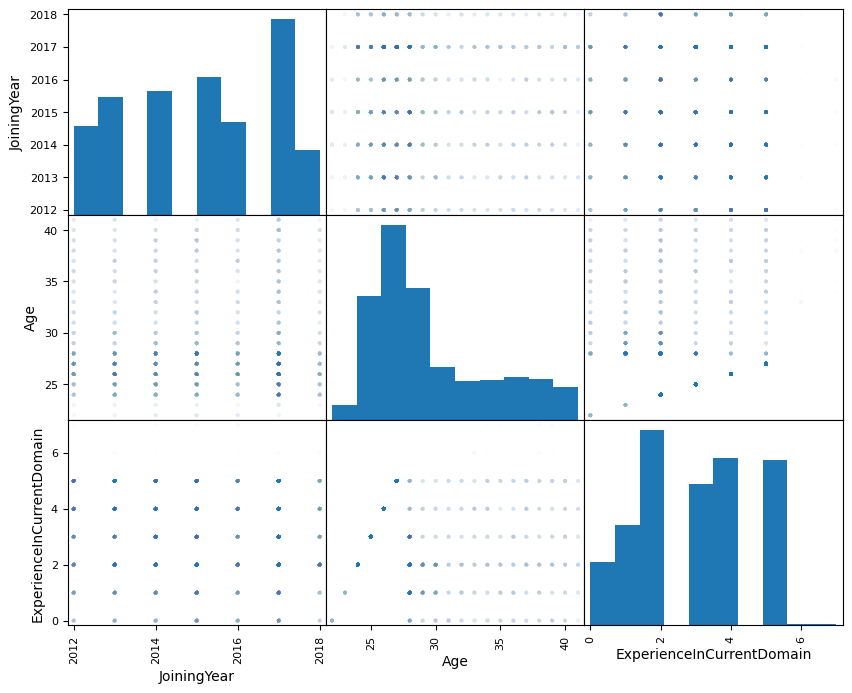

In [ ]:
pd.plotting.scatter_matrix(data_raw, figsize = (10, 8),alpha=.01)
pass

Здесь никаких выбросов и странных показателей не замечено. Проверим на всякий случай.

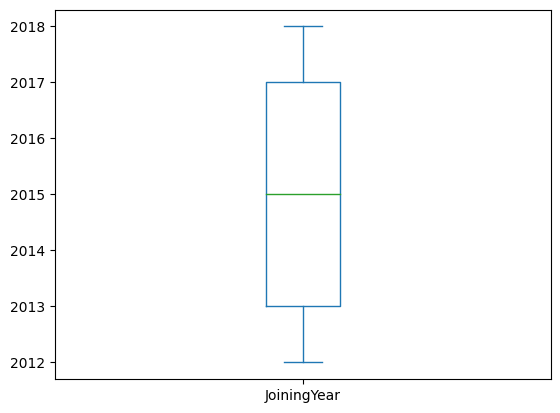

In [ ]:
data_raw['JoiningYear'].plot(kind='box')
pass

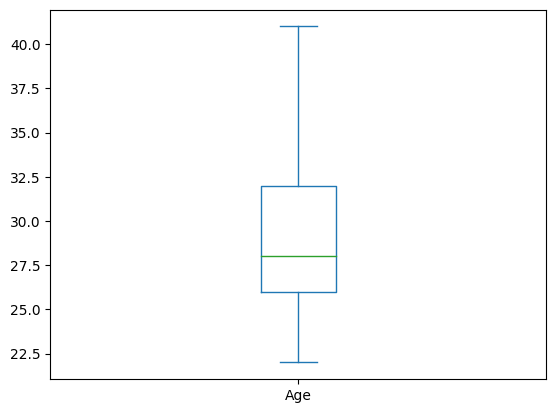

In [ ]:
data_raw['Age'].plot(kind='box')
pass

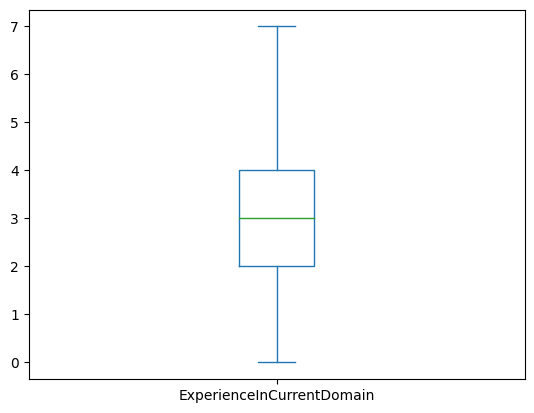

In [ ]:
data_raw['ExperienceInCurrentDomain'].plot(kind='box')
pass

Выбросов не обнаружено, рассомотрим сколько раз номанильные переменные принимают то или иное значение.

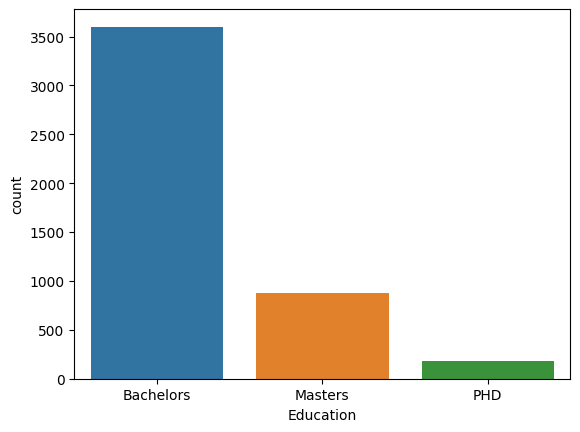

In [ ]:
sns.countplot(x='Education', data=data_raw)
pass

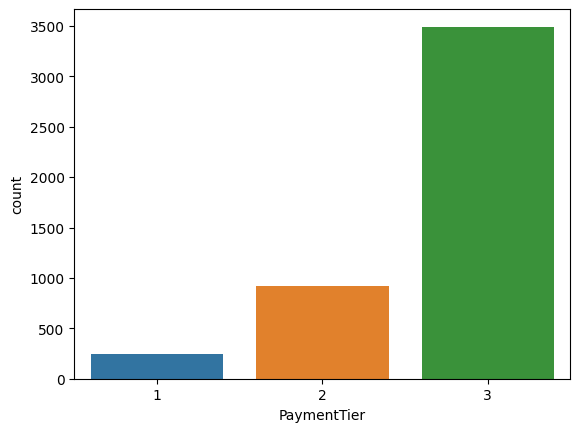

In [ ]:
sns.countplot(x='PaymentTier', data=data_raw)
pass

Зависимость образования человека и уровня его зарплаты.

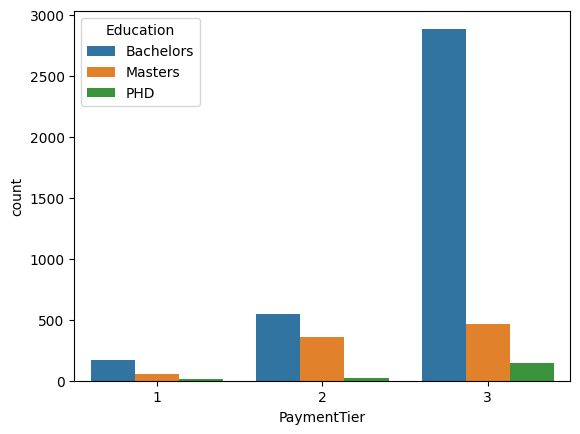

In [ ]:
sns.countplot(x='PaymentTier',  hue='Education', data=data_raw)
pass

Зависимость статуса работы от зарплаты работника.

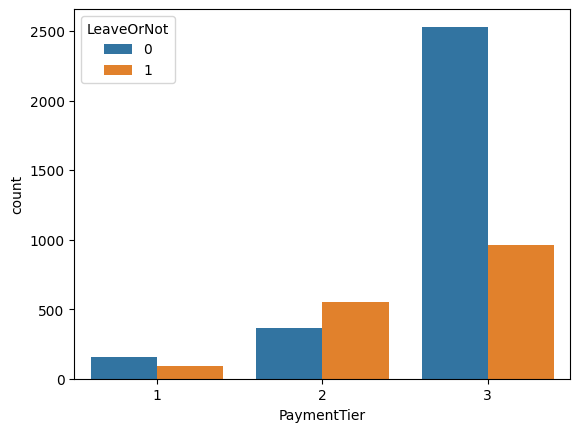

In [ ]:
sns.countplot(x='PaymentTier',  hue='LeaveOrNot', data=data_raw)
pass

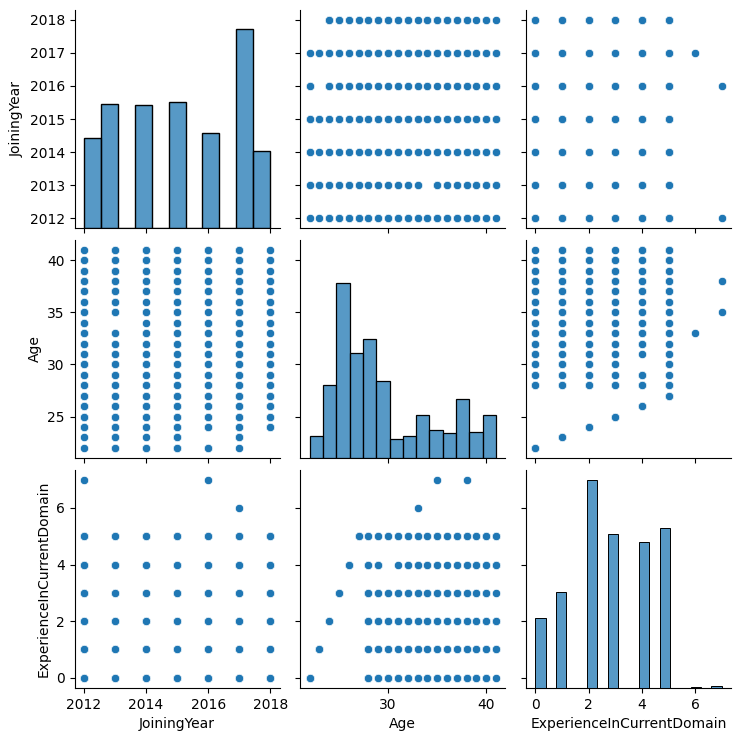

In [ ]:
sns.pairplot(data_raw.sample(1000), diag_kind='hist')
pass

Ничего особо интересного замеить я не смог.

##  Разбитие на тестовую и обучающую выборки.

Будем использовать все входные признаки кроме `LeaveOrNot`.

In [ ]:
X = data_raw.drop(['LeaveOrNot'], axis=1)
y = data_raw['LeaveOrNot']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(3489, 1164)

##  Бинаризация номинальных признаков

Закодируем категориальные признаки  с помощью числовых.

In [ ]:
data_raw.describe(include=['category'])

,Education,City,PaymentTier,Gender,EverBenched,LeaveOrNot
count,4653,4653,4653,4653,4653,4653
unique,3,3,3,2,2,2
top,Bachelors,Bangalore,3,Male,No,0
freq,3601,2228,3492,2778,4175,3053


In [ ]:
data_raw['Education'].dtype

CategoricalDtype(categories=['Bachelors', 'Masters', 'PHD'], ordered=False)

In [ ]:
data_raw['City'].dtype

CategoricalDtype(categories=['Bangalore', 'New Delhi', 'Pune'], ordered=False)

In [ ]:
data_raw['PaymentTier'].dtype

CategoricalDtype(categories=[1, 2, 3], ordered=False)

In [ ]:
data_raw['Gender'].dtype

CategoricalDtype(categories=['Female', 'Male'], ordered=False)

In [ ]:
data_raw['EverBenched'].dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False)

In [ ]:
data_raw['LeaveOrNot'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

Заменим бинарные признаки на числовые, к `City` и `Education` применим метод бинаризации.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse=False)
enc.fit(X_train[['Education', 'City', 'Gender', 'EverBenched' ]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='if_binary', sparse=False, sparse_output=False)

In [ ]:
dummies = pd.DataFrame(enc.transform(X_train[['Education', 'City', 'Gender', 'EverBenched' ]]),
                       columns=enc.get_feature_names_out(), index=X_train.index)
dummies.head()

,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
3274,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2578,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3716,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2073,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1033,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
dummies2 = pd.DataFrame(enc.transform(X_test[['Education', 'City', 'Gender', 'EverBenched' ]]),
                       columns=enc.get_feature_names_out(), index=X_test.index)
dummies2.head()

,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
297,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2705,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
501,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1272,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3956,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Добавим эти столбы к изначально таблице.

In [ ]:
X_train = pd.concat((X_train, dummies), axis=1).drop(['Education', 'City', 'Gender', 'EverBenched'], axis=1)

In [ ]:
X_train.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
3274,2013,3,35,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2578,2013,3,27,5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3716,2015,3,32,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2073,2017,2,29,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1033,2016,3,28,3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_test = pd.concat((X_test, dummies2), axis=1).drop(['Education', 'City', 'Gender', 'EverBenched'], axis=1)

In [ ]:
X_train.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
3274,2013,3,35,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2578,2013,3,27,5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3716,2015,3,32,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2073,2017,2,29,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1033,2016,3,28,3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Масштабирование количественных признаков.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
scaler.fit(X_test)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns, index=X_test.index)

In [ ]:
X_test.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
count,1.164000e+03,1.164000e+03,1.164000e+03,1.164000e+03,1.164000e+03,1.164000e+03,1.164000e+03,1.164000e+03,1.164000e+03,1.164000e+03,1.164000e+03,1.164000e+03
mean,-4.942209e-14,-2.014425e-16,2.975856e-17,4.120415e-17,9.843214e-17,9.156479e-18,-9.156479e-18,-6.714751e-17,2.594336e-17,4.273023e-17,-1.526080e-18,-9.156479e-18
std,1.000430e+00,1.000430e+00,1.000430e+00,1.000430e+00,1.000430e+00,1.000430e+00,1.000430e+00,1.000430e+00,1.000430e+00,1.000430e+00,1.000430e+00,1.000430e+00
min,-1.633254e+00,-3.157501e+00,-1.534965e+00,-1.865728e+00,-1.926798e+00,-4.568618e-01,-2.028421e-01,-9.745505e-01,-5.402758e-01,-6.343577e-01,-1.193734e+00,-3.499552e-01
25%,-1.092091e+00,5.251955e-01,-6.884890e-01,-5.787903e-01,5.189958e-01,-4.568618e-01,-2.028421e-01,-9.745505e-01,-5.402758e-01,-6.343577e-01,-1.193734e+00,-3.499552e-01
50%,-9.763262e-03,5.251955e-01,-2.652510e-01,6.467857e-02,5.189958e-01,-4.568618e-01,-2.028421e-01,-9.745505e-01,-5.402758e-01,-6.343577e-01,8.377078e-01,-3.499552e-01
75%,1.072564e+00,5.251955e-01,5.812250e-01,7.081475e-01,5.189958e-01,-4.568618e-01,-2.028421e-01,1.026114e+00,-5.402758e-01,1.576398e+00,8.377078e-01,-3.499552e-01
max,1.613728e+00,5.251955e-01,2.485796e+00,2.638554e+00,5.189958e-01,2.188846e+00,4.929944e+00,1.026114e+00,1.850907e+00,1.576398e+00,8.377078e-01,2.857508e+00


##  Работа с моделью


Для задачи классификации используем матод ближайших соседей.


In [ ]:
y_test

297     1
2705    0
501     1
1272    0
3956    0
       ..
4417    1
1533    0
3508    0
52      0
4140    0
Name: LeaveOrNot, Length: 1164, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_test_predict1 = knn.predict(X_train)
err_test1  = np.mean(y_train  != y_test_predict1)
err_test1

0.175981656635139

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_test_predict1))

[[2190   88]
 [ 526  685]]


In [ ]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.17611683848797252

Получили процент ошибки порядка 18 процентов. Сделаем confusion матрицу.

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[739  36]
 [169 220]]


Произведем исследование на количество соседей.

In [ ]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.19948292329479966 10


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.175981656635139 0.17611683848797252
